# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import os


Insight: 
* Mengimport library yang diperlukan

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Insight
* Memuat dataset dari kaggle (file format .csv)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Ukuran dataset:", df.shape)
df.info()

Ukuran dataset: (55500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), 

Insight: 
* Untuk mengetahui ukuran dan terdapat kolom apa saja, pada dataset

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Insight: 
* Untuk mengecek angka statistik pada kolom numerik

In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Insight: 
* Untuk mengecek apakah terdapat missing value atau tidak pada dataset


Distribusi kolom: Gender
Gender
Male      27774
Female    27726
Name: count, dtype: int64

Distribusi kolom: Blood Type
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

Distribusi kolom: Admission Type
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

Distribusi kolom: Insurance Provider
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

Distribusi kolom: Doctor
Doctor
Michael Smith          27
Robert Smith           22
John Smith             22
Michael Johnson        20
James Smith            20
                       ..
Timothy Chapman         1
Terri Collins           1
Jill Jacobson           1
Jesse Combs             1
Christopher Estrada     1
Name: count, Length: 40341, dtype: int64

Distribusi kolom: Hospital
Hospital
LLC 

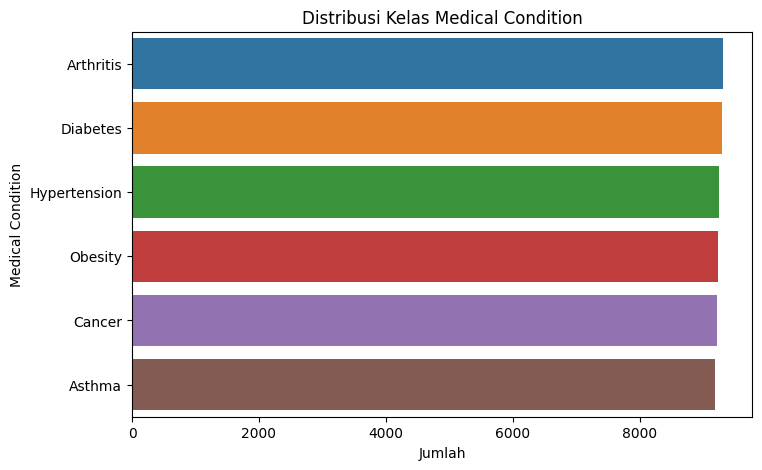

In [6]:
df['Medical Condition'].value_counts()

categorical_cols = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 
                    'Doctor', 'Hospital', 'Medication']

for col in categorical_cols:
    print(f"\nDistribusi kolom: {col}")
    print(df[col].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title('Distribusi Kelas Medical Condition')
plt.xlabel('Jumlah')
plt.ylabel('Medical Condition')
plt.show()

Insight: 
* Untuk mengecek distribusi target dan kategori

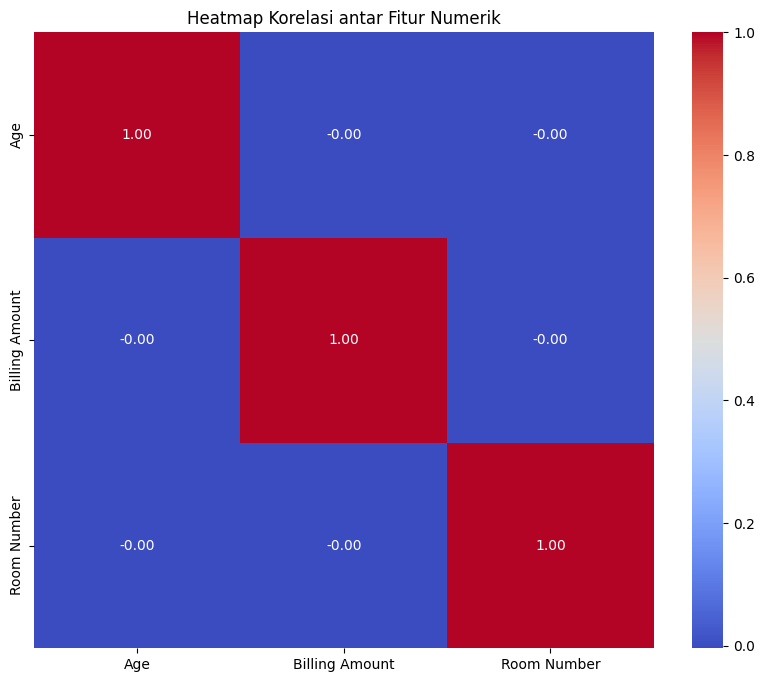

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()


Insight: 
* Menggunakaan heatmap untuk korelasi numerik

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
X = df.drop(columns=['Medical Condition'])
y = df['Medical Condition']

Insight: 
* Memisahkan fitur dan label 

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Arthritis': 0, 'Asthma': 1, 'Cancer': 2, 'Diabetes': 3, 'Hypertension': 4, 'Obesity': 5}


Insight: 
* Encode Label (Target) agar lebih mudah, dengan kode masing-masing penyakit diberi nomor

In [10]:
X_encoded = X.copy()

for col in categorical_cols:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

Insight: 
* Encode untuk bagian kategorikal

In [11]:
numeric_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

Insight: 
* Standarisasi fitur numerik dengan Standard Scaler 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (44400, 14)
Test size: (11100, 14)


Insight: 
* Split data antara train dan test

In [13]:
os.makedirs("namadataset_preprocessing", exist_ok=True)
X_combined = X_train.copy()
X_combined["target"] = y_train
X_combined.to_csv("namadataset_preprocessing/healthcare_preprocessed.csv", index=False)

Insight:
* Export hasil yang sudah dibersihkan